In [1]:
import numpy as np
import matplotlib.pyplot as plt
from synthetic import TestSuite
from src.models.nn import Model_LSTM
import torch

def RMSE_Loss(actual, predicted):
    """Root Mean Squared Error"""
    return torch.sqrt(torch.mean(torch.square(actual - predicted)))

def min_max_transform(series):
  series_temp = np.copy(series)
  for i in range(len(series_temp)):
    series_temp[i] = (series_temp[i] - np.max(series))/(np.max(series)-np.min(series)) + 1
  return series_temp

import os, shutil
DIR="experiment_nn_lstm/"
FILE_NAME=DIR+"/log.csv"
if os.path.exists(DIR): shutil.rmtree(DIR)
if not os.path.exists(DIR): os.mkdir(DIR)

In [2]:
def executeNN(X_train, X_test, Y_train, Y_test):
    model_nn_lstm = Model_LSTM(error_fun=RMSE_Loss)
    model_nn_lstm.__train__(X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test)

    rmse_train = model_nn_lstm.__get_error_train__()
    rmse_test = model_nn_lstm.__get_error_test__()

    yhat_train = model_nn_lstm.__get_yhat_train__()
    yhat_test = model_nn_lstm.__get_yhat_test__()

    X_series, Y_series = np.concatenate((X_train, X_test), axis=0), np.concatenate((Y_train, Y_test), axis=0)
    X_series, Y_series = torch.tensor(X_series, dtype=torch.float32), torch.tensor(Y_series, dtype=torch.float32)
    model_nn_lstm.__test__(X_test=X_series, Y_test=Y_series)
    yhat_series = model_nn_lstm.__get_yhat_test__()
    
    return rmse_train, rmse_test, yhat_train, yhat_test, yhat_series, model_nn_lstm.epochs, model_nn_lstm.model

In [3]:
synthetic_dataset_test_suite = TestSuite()
series = synthetic_dataset_test_suite.__get_numpy_test_series_from_index__((6))
X_train, X_test, Y_train, Y_test = synthetic_dataset_test_suite.__train_and_test_from_numpy_series__(
    transform=min_max_transform,
    series=series,
    mixed=False,
    feature_length=10,
    offset=10,
    target_length=5,
    tensor = True
)
rmse_train, rmse_test, yhat_train, yhat_test, yhat_series, epochs, model = executeNN(X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)

EPOCH 50
EPOCH 100
EPOCH 150
EPOCH 200
EPOCH 250
EPOCH 300


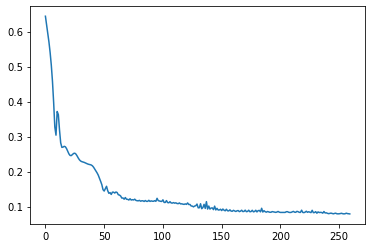

In [4]:
plt.plot(rmse_test)

In [5]:
print(rmse_test[-1])

0.07880693674087524


In [6]:
# plt.plot(Y_test)
# plt.plot(yhat_test.detach().numpy().flatten())

In [7]:
# temp_X_test = X_test[0]
# y_tests = []
# for i in range(X_test.size()[0]):
#     temp_X_test = temp_X_test.reshape(1, 4)
#     yhat_test = model(temp_X_test)
#     temp = temp_X_test.numpy()
#     temp = np.append(temp, yhat_test.detach().numpy())
#     temp = temp[1::]
#     print(temp_X_test)
#     temp_X_test = torch.tensor(temp)
    
#     y_tests.append(yhat_test.detach().numpy())
# #     temp_X_test